
改进上个模型

In [179]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [180]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

In [181]:
#分析数据
print(train_df.columns.values)
#features 特征分类
#分类特征Categorical: Survived, Sex, and Embarked. 
#Ordinal: Pclass.
#连续值Continous: Age, Fare.  连续亦有序
#离散值Discrete: SibSp, Parch.

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


'PassengerId' 
'Survived' 
'Pclass'  种类
'Name' 'Sex' 'Age' 
'SibSp' # of siblings / spouses aboard the Titanic
'Parch' # 
 'Ticket'  Ticket number
 'Fare'  费用
 'Cabin' 客舱
 'Embarked' Port of Embarkation


In [182]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [184]:
# 信息概要
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [185]:
train_df.describe()
#该方法直接查看数据值的分布
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


What is the distribution of numerical feature values across the samples?

This helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

    Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
    Survived is a categorical feature with 0 or 1 values.
    Around 38% samples survived representative of the actual survival rate at 32%.
    Most passengers (> 75%) did not travel with parents or children.
    Nearly 30% of the passengers had siblings and/or spouse aboard.
    Fares varied significantly with few passengers (<1%) paying as high as $512.
    Few elderly passengers (<1%) within age range 65-80.



In [186]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Eitemiller, Mr. George Floyd",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [187]:
pclass=train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(pclass)
#pc高的容易获救

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [188]:
train_df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [189]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [190]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


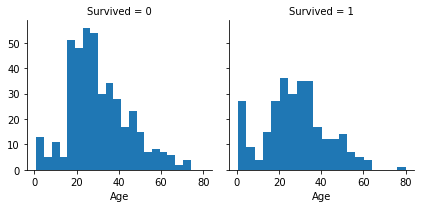

In [191]:
##直方图分析
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


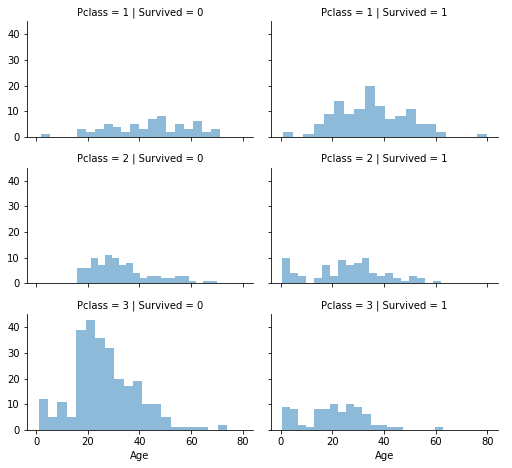

In [192]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis)

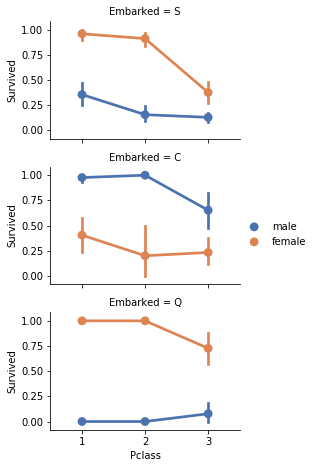

In [193]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


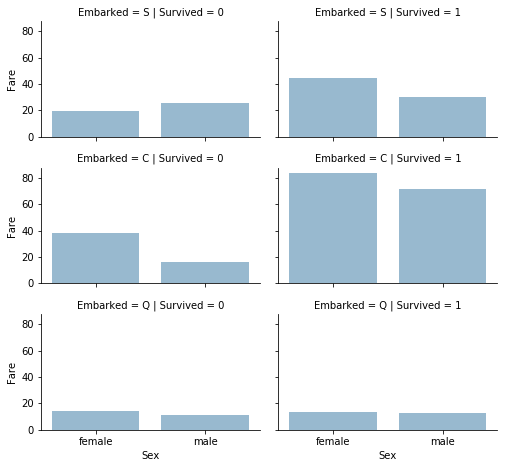

In [194]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


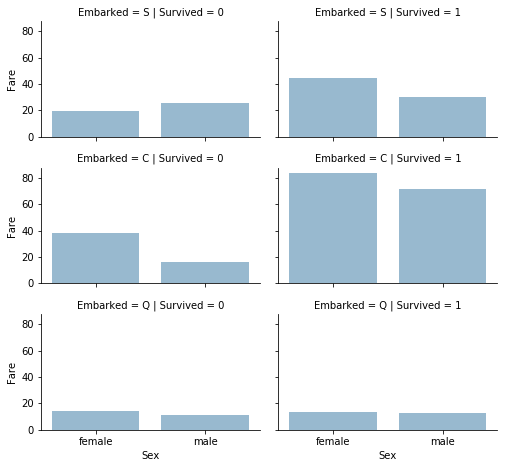

In [195]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


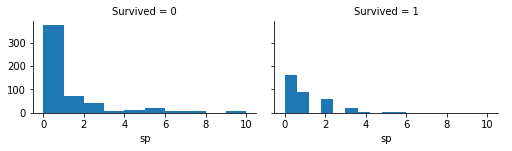

In [196]:
train_df['sp']=train_df['SibSp']+train_df['Parch']
grid = sns.FacetGrid(train_df, col='Survived', size=2.2, aspect=1.6)
grid.map(plt.hist, 'sp', bins=10)
grid.add_legend()
# g = sns.FacetGrid(train_df, col='Survived')
# g.map(plt.hist, 'Age', bins=20)

In [197]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 13) (418, 11) (891, 13) (418, 11)


('After', (891, 11), (418, 9), (891, 11), (418, 9))

In [198]:
#视图抽取title
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [199]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [200]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr


In [58]:
#本次放弃将title数值化
# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# for dataset in combine:
#     dataset['Title'] = dataset['Title'].map(title_mapping)
#     dataset['Title'] = dataset['Title'].fillna(0)

# train_df.head()

In [201]:
#去除name，name的关联性直觉上不大
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 10), (418, 9))

In [202]:
# train_df = train_df.drop(['sp'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title
0,0,3,male,22.0,1,0,7.2500,S,1,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,Mr


In [203]:
#不进行sex数值化
for dataset in combine:
    dataset['Sex_number'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title,Sex_number
0,0,3,male,22.0,1,0,7.2500,S,1,Mr,0
1,1,1,female,38.0,1,0,71.2833,C,1,Mrs,1
2,1,3,female,26.0,0,0,7.9250,S,0,Miss,1
3,1,1,female,35.0,1,0,53.1000,S,1,Mrs,1
4,0,3,male,35.0,0,0,8.0500,S,0,Mr,0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


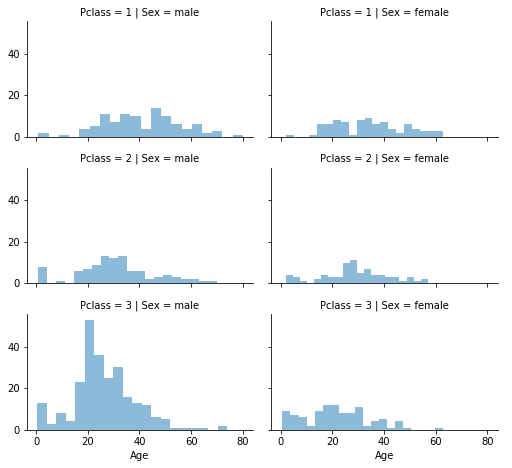

In [204]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [205]:
#根据经验猜年龄
guess_ages = np.zeros((2,3))
guess_ages
#         pclass1 2 3
# male
# female

array([[0., 0., 0.],
       [0., 0., 0.]])

In [206]:
sexDict={'male':0,'female':1}
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex_number'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex_number == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title,Sex_number
0,0,3,male,22,1,0,7.2500,S,1,Mr,0
1,1,1,female,38,1,0,71.2833,C,1,Mrs,1
2,1,3,female,26,0,0,7.9250,S,0,Miss,1
3,1,1,female,35,1,0,53.1000,S,1,Mrs,1
4,0,3,male,35,0,0,8.0500,S,0,Mr,0


In [207]:
train_df=train_df.drop(['Sex_number'],axis=1)
test_df=test_df.drop(['Sex_number'],axis=1)

In [208]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title
0,0,3,male,22,1,0,7.2500,S,1,Mr
1,1,1,female,38,1,0,71.2833,C,1,Mrs
2,1,3,female,26,0,0,7.9250,S,0,Miss
3,1,1,female,35,1,0,53.1000,S,1,Mrs
4,0,3,male,35,0,0,8.0500,S,0,Mr


In [209]:
#可见，需要对数据有更多的理解，才能确定哪些特征是有用的
# train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
# train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

In [210]:
# for dataset in combine:    
#     dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
# train_df.head()

In [211]:
# train_df = train_df.drop(['AgeBand'], axis=1)
# combine = [train_df, test_df]
# train_df.head()

In [219]:
train_df['FamilySize'] = train_df['SibSp'] + dataset['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + dataset['Parch'] + 1
train_df.head()
# train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title,FamilySize
0,0,3,male,22,1,0,7.2500,S,1,Mr,2.0
1,1,1,female,38,1,0,71.2833,C,1,Mrs,2.0
2,1,3,female,26,0,0,7.9250,S,0,Miss,1.0
3,1,1,female,35,1,0,53.1000,S,1,Mrs,2.0
4,0,3,male,35,0,0,8.0500,S,0,Mr,2.0


In [228]:
#is alone
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1
train_df.head()
# train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,sp,Title,FamilySize,IsAlone
0,0,3,male,22,1,0,7.2500,S,1,Mr,2.0,0
1,1,1,female,38,1,0,71.2833,C,1,Mrs,2.0,0
2,1,3,female,26,0,0,7.9250,S,0,Miss,1.0,1
3,1,1,female,35,1,0,53.1000,S,1,Mrs,2.0,0
4,0,3,male,35,0,0,8.0500,S,0,Mr,2.0,0


In [229]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,sp,Title,IsAlone
0,0,3,male,22,7.2500,S,1,Mr,0
1,1,1,female,38,71.2833,C,1,Mrs,0
2,1,3,female,26,7.9250,S,0,Miss,1
3,1,1,female,35,53.1000,S,1,Mrs,0
4,0,3,male,35,8.0500,S,0,Mr,0


In [232]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age//10 * dataset.Pclass   
train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,6,22,3
1,3,38,1
2,6,26,3
3,3,35,1
4,9,35,3
5,6,25,3
6,5,54,1
7,0,2,3
8,6,27,3
9,2,14,2


In [233]:
train_df[['Age*Class', 'Survived']].groupby(['Age*Class'], as_index=False).mean()

,Age*Class,Survived
0,0,0.612903
1,1,0.833333
2,2,0.634615
3,3,0.520000
4,4,0.451327
5,5,0.555556
6,6,0.265487
7,7,0.000000
8,8,0.578947
9,9,0.217391


In [234]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [235]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [236]:
# for dataset in combine:
#     dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,sp,Title,IsAlone,Age*Class
0,0,3,male,22,7.2500,S,1,Mr,0,6
1,1,1,female,38,71.2833,C,1,Mrs,0,3
2,1,3,female,26,7.9250,S,0,Miss,1,6
3,1,1,female,35,53.1000,S,1,Mrs,0,3
4,0,3,male,35,8.0500,S,0,Mr,0,9


In [237]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,male,34,7.8292,Q,Mr,1,9
1,893,3,female,47,7.0000,S,Mrs,0,12
2,894,2,male,62,9.6875,Q,Mr,1,12
3,895,3,male,27,8.6625,S,Mr,1,6
4,896,3,female,22,12.2875,S,Mrs,0,6


In [57]:
# train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
# train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [58]:
# for dataset in combine:
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
#     dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

# train_df = train_df.drop(['FareBand'], axis=1)
# combine = [train_df, test_df]
    
# train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [243]:
train_df=train_df.drop(['sp'],axis=1)
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,male,22,7.2500,S,Mr,0,6
1,1,1,female,38,71.2833,C,Mrs,0,3
2,1,3,female,26,7.9250,S,Miss,1,6
3,1,1,female,35,53.1000,S,Mrs,0,3
4,0,3,male,35,8.0500,S,Mr,0,9
5,0,3,male,25,8.4583,Q,Mr,1,6
6,0,1,male,54,51.8625,S,Mr,1,5
7,0,3,male,2,21.0750,S,Master,0,0
8,1,3,female,27,11.1333,S,Mrs,1,6
9,1,2,female,14,30.0708,C,Mrs,0,2


In [240]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,male,34,7.8292,Q,Mr,1,9
1,893,3,female,47,7.0000,S,Mrs,0,12
2,894,2,male,62,9.6875,Q,Mr,1,12
3,895,3,male,27,8.6625,S,Mr,1,6
4,896,3,female,22,12.2875,S,Mrs,0,6


In [262]:
##hot encode
#独热编码
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
trainn=vec.fit_transform(train_df.T.to_dict().values())
train_df2 =pd.DataFrame(trainn,columns=vec.feature_names_)
print(vec.feature_names_)
print(train_df2.shape)

vec2 = DictVectorizer(sparse=False, dtype=int)
testt=vec2.fit_transform(test_df.T.to_dict().values())
test_df2 =pd.DataFrame(testt,columns=vec2.feature_names_)
print(vec2.feature_names_)
print(test_df2.shape)



['Age', 'Age*Class', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'IsAlone', 'Pclass', 'Sex=female', 'Sex=male', 'Survived', 'Title=Master', 'Title=Miss', 'Title=Mr', 'Title=Mrs', 'Title=Rare']
(891, 16)
['Age', 'Age*Class', 'Embarked=C', 'Embarked=Q', 'Embarked=S', 'Fare', 'IsAlone', 'PassengerId', 'Pclass', 'Sex=female', 'Sex=male', 'Title=Master', 'Title=Miss', 'Title=Mr', 'Title=Mrs', 'Title=Rare']
(418, 16)


In [263]:
X_train = train_df2.drop("Survived", axis=1)
Y_train = train_df2["Survived"]
X_test  = test_df2.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 15), (891,), (418, 15))

In [265]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


81.59

In [266]:
coeff_df = pd.DataFrame(train_df2.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Sex=male,1.668665
10,Title=Master,1.433096
13,Title=Mrs,0.783036
2,Embarked=Q,0.741085
3,Embarked=S,0.607371
6,Pclass,0.264300
11,Title=Miss,0.257206
4,Fare,0.206617
5,IsAlone,0.000078
1,Embarked=C,-0.008652


In [313]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


89.0

In [314]:
# Support Vector Machines
svc2 = SVC(C=50)
svc2.fit(X_train, Y_train)
Y_pred_svc2 = svc.predict(X_test)
acc_svc2 = round(svc2.score(X_train, Y_train) * 100, 2)
acc_svc2
# kernalIt must be one of  rbf‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


95.96

In [339]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca降维
pca = PCA(n_components=9, whiten=True, random_state=42)
svc3 = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc3)
model.fit(X_train, Y_train)
Y_pred_pipe = model.predict(X_test)
acc_svcp = round(model.score(X_train, Y_train) * 100, 2)
acc_svcp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


84.18

In [327]:
#网格化检索svc

# # from sklearn.pipeline import make_pipeline
# # svc = SVC(kernel='rbf', class_weight='balanced')
# # model = make_pipeline(svc)

# from sklearn.model_selection import GridSearchCV
# param_grid = {'pca__n_components': [2, 5, 7,8,9,10, 12]    }
# grid = GridSearchCV(svc, param_grid)

# %time grid.fit(X_train, Y_train)
# print(grid)

In [290]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [296]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.45

In [298]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


70.82

In [299]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


72.73

In [300]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


72.05

In [301]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.08

In [302]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.08

In [340]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Support Vector Machines 2', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','pcv_svc'],
    'Score': [acc_svc,acc_svc2, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_svcp]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Random Forest,97.08
9,Decision Tree,97.08
1,Support Vector Machines 2,95.96
0,Support Vector Machines,89.00
10,pcv_svc,84.18
3,Logistic Regression,81.59
2,KNN,81.37
5,Naive Bayes,78.45
8,Linear SVC,72.73
7,Stochastic Gradient Decent,72.05


In [341]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_pipe
    })
submission.to_csv('./submission_pca.csv', index=False)

In [ ]:
dt   97.08-- 0.64593
svc2 95.96   0.66985
svc1 89.0 -- 0.66985
pca- 84.18-- 0.79425
    默认内容 0.77990


